# PREPARATION

In [1]:
#Setting Up All the Required Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib

# 1. Data Wrangling

## 1.1 Gathering Data

In [2]:
# Display the dataset to check its structure and content
data_balita = pd.read_csv("https://raw.githubusercontent.com/RyanRizaldy/StuntTrack/refs/heads/main/capstoneProject/ML/dataset/data_balita.csv")
data_balita.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


## 1.2 Assesing Data

In [3]:
# information of dataset
data_balita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [4]:
# Describe the dataset
data_balita.describe()

,Umur (bulan),Tinggi Badan (cm)
count,120999.000000,120999.000000
mean,30.173803,88.655434
std,17.575119,17.300997
min,0.000000,40.010437
25%,15.000000,77.000000
50%,30.000000,89.800000
75%,45.000000,101.200000
max,60.000000,128.000000


## 1.2.2 Checking for Missing Value

In [5]:
# finding missing value
data_balita.isna().sum()

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64

## 1.2.3 Checking for Duplicates

In [6]:
data_balita.shape

(120999, 4)

In [7]:
# Display category on Jenis Kelamin
data_balita['Jenis Kelamin'].value_counts()

Jenis Kelamin
perempuan    61002
laki-laki    59997
Name: count, dtype: int64

In [8]:
print("Number of Duplicates: ", data_balita.duplicated().sum())
print("Sample Size:", len(data_balita))

data_balita.describe()

Number of Duplicates:  81574
Sample Size: 120999


,Umur (bulan),Tinggi Badan (cm)
count,120999.000000,120999.000000
mean,30.173803,88.655434
std,17.575119,17.300997
min,0.000000,40.010437
25%,15.000000,77.000000
50%,30.000000,89.800000
75%,45.000000,101.200000
max,60.000000,128.000000


# 1.3 Data Cleaning

## 1.3.1 Removing Duplicate Data

In [9]:
# remove duplicate data
data_balita.drop_duplicates(inplace=True)

In [10]:
print("Number of Duplicates :  ", data_balita.duplicated().sum())

Number of Duplicates :   0


Status Gizi    normal  severely stunted  stunted  tinggi
Jenis Kelamin                                           
laki-laki       10550              3364     2168    3319
perempuan       10964              3156     2249    3655


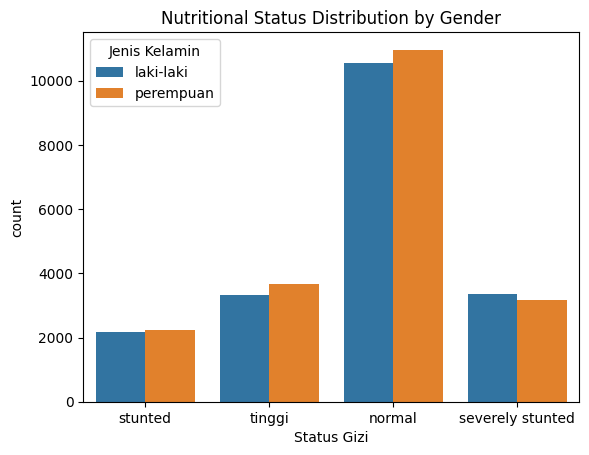

In [11]:
# Create a cross-tabulation to view the distribution of nutritional status by gender
gender_status = pd.crosstab(data_balita['Jenis Kelamin'], data_balita['Status Gizi'])
print(gender_status)

# Visualize the distribution of nutritional status by gender using a count plot
sns.countplot(x='Status Gizi', hue='Jenis Kelamin', data=data_balita)
plt.title("Nutritional Status Distribution by Gender")
plt.show()

## 1.4 Data Transformation

In [12]:
# Encode 'Jenis Kelamin' column: map 'laki-laki' to 1 and 'perempuan' to 0
data_balita['Jenis Kelamin'] = data_balita['Jenis Kelamin'].map({'laki-laki': 1, 'perempuan': 0})

# Encode 'Status Gizi' column: 
# 'severely stunted' -> 0, 'stunted' -> 1, 'normal' -> 2, and 'tinggi' -> 3
data_balita['Status Gizi'] = data_balita['Status Gizi'].map({'severely stunted': 0, 'stunted': 1, 'normal': 2, 'tinggi': 3})

In [13]:
# Display dataset information after encoding, including column types
data_balita.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39425 entries, 0 to 120993
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Umur (bulan)       39425 non-null  int64  
 1   Jenis Kelamin      39425 non-null  int64  
 2   Tinggi Badan (cm)  39425 non-null  float64
 3   Status Gizi        39425 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1.5 MB


In [14]:
# Display the first few rows of the dataset to inspect the encoded values
data_balita.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,1,44.591973,1
1,0,1,56.705203,3
2,0,1,46.863358,2
3,0,1,47.508026,2
4,0,1,42.743494,0


In [ ]:
# Save the encoded dataset to a new CSV file
data_balita.to_csv('D:\YOVELA KALISTA\Bangkit 2024 Batch 7\MLCapstone/data_balita_encoded.csv', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\Y'
<>:1: SyntaxWarning: invalid escape sequence '\Y'
C:\Users\DELL\AppData\Local\Temp\ipykernel_3052\2784877279.py:1: SyntaxWarning: invalid escape sequence '\Y'
  data_balita.to_csv('D:\YOVELA KALISTA\Bangkit 2024 Batch 7\MLCapstone/data_balita_encoded.csv', index=False)


## 1.5 Balancing the dataset by trimming

In [ ]:
# The dataset is imbalanced, so we trim it to ensure fairness in training.
# Displaying the dataset after encoding
data_balita_encoded = pd.read_csv("https://raw.githubusercontent.com/RyanRizaldy/StuntTrack/refs/heads/main/capstoneProject/ML/dataset/data_balita_encoded.csv")
data_balita_encoded.head()


,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,1,44.591973,1
1,0,1,56.705203,3
2,0,1,46.863358,2
3,0,1,47.508026,2
4,0,1,42.743494,0


In [23]:
data_balita_encoded['Umur (bulan)'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

In [ ]:
# Grouping the dataset based on 'Age (months)' and 'Nutritional Status'
grouped = data_balita_encoded.groupby(['Umur (bulan)', 'Status Gizi']).size().reset_index(name='count')

# Filtering data where 'Nutritional Status' is equal to 2
status_gizi_2 = grouped[grouped['Status Gizi'] == 2]

# Displaying the result
print(status_gizi_2)

     Umur (bulan)  Status Gizi  count
2               0            2    988
6               1            2    713
10              2            2    688
14              3            2    201
18              4            2    208
..            ...          ...    ...
226            56            2    427
230            57            2    437
234            58            2    436
238            59            2    439
242            60            2    439

[61 rows x 3 columns]


In [25]:
class_counts = data_balita_encoded['Status Gizi'].value_counts()

In [26]:
min_class_count = class_counts[class_counts != 2].min()

In [27]:
status_gizi_2 = data_balita_encoded[data_balita_encoded['Status Gizi'] == 2]
status_gizi_2_under = status_gizi_2.sample(n=min_class_count, random_state=42)

In [ ]:
# This isolates rows belonging to other classes for later merging.
status_gizi_other = data_balita_encoded[data_balita_encoded['Status Gizi'] != 2]

In [ ]:
# Combining the sampled data of class '2' with the filtered dataset
df_balanced = pd.concat([status_gizi_2_under, status_gizi_other])

In [ ]:
# Checking the final class distribution to ensure balance
print(df_balanced['Status Gizi'].value_counts())

Status Gizi
3    6974
0    6520
1    4417
2    4417
Name: count, dtype: int64


In [ ]:
# Saving the trimmed and balanced dataset
df_balanced.to_csv('D:\YOVELA KALISTA\Bangkit 2024 Batch 7\MLCapstone/data_balita_balanced.csv', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\Y'
<>:1: SyntaxWarning: invalid escape sequence '\Y'
C:\Users\DELL\AppData\Local\Temp\ipykernel_3052\3580638831.py:1: SyntaxWarning: invalid escape sequence '\Y'
  df_balanced.to_csv('D:\YOVELA KALISTA\Bangkit 2024 Batch 7\MLCapstone/data_balita_balanced.csv', index=False)
